# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [109]:
# Load data and split into feature and target variables
breast_cancer = load_breast_cancer( as_frame=True )
featureMatrix = breast_cancer.data
targetVector  = breast_cancer.target.squeeze()
print(f"Checking shapes: {featureMatrix.shape=}, {targetVector.shape=}")

targetNameMap = dict(enumerate( breast_cancer.target_names.tolist() ))
print(f"{targetNameMap=}")


Checking shapes: featureMatrix.shape=(569, 30), targetVector.shape=(569,)
targetNameMap={0: 'malignant', 1: 'benign'}


In [110]:
# View first 5 rows of the data
featureMatrix.head(5).T # transposing to help visualize

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [111]:
# How frequently does the positive target occur?
counts = targetVector.value_counts()
freq = counts[1] / counts.sum()
print(f"the positive target occurred {counts[1]} times, or {freq:.1%} of the time..\n")
counts

the positive target occurred 357 times, or 62.7% of the time..



,count
target,
1,357
0,212


In [112]:
# Generate summary statistics for the data
featureMatrix.describe().T # transposing to help visualize

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


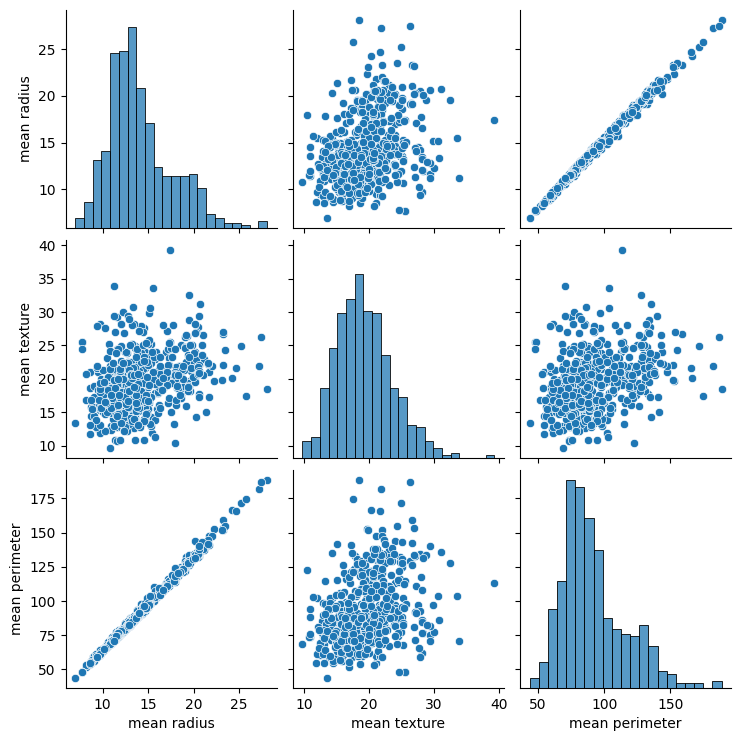

In [113]:
# Create a pairplot for the first few features
aFewCols = list( featureMatrix.columns )[:3]
ax = sns.pairplot( featureMatrix[ aFewCols ])
plt.show()

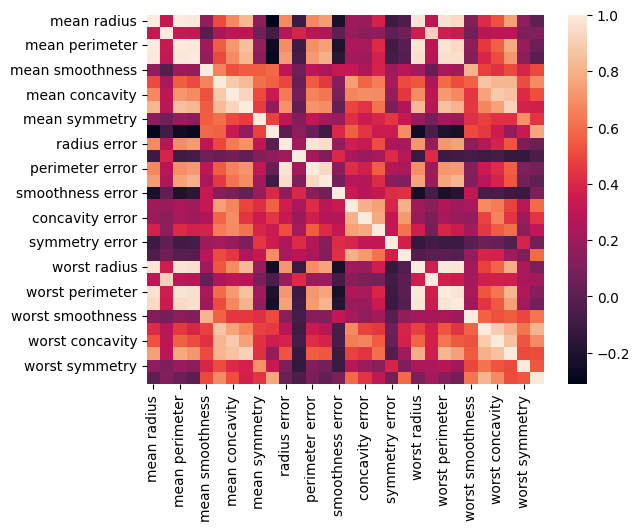


Let's check for multicollinearity, using |r| > 0.8

The feature pairs with the highest correlation are...



,feature1,feature2,r
0,mean perimeter,mean radius,0.997855
24,worst perimeter,worst radius,0.993708
1,mean area,mean radius,0.987357
2,mean area,mean perimeter,0.986507
30,worst area,worst radius,0.984015


In [114]:
# Create a correlation coefficeint heatmap
corr = featureMatrix.corr()

ax = sns.heatmap( corr )
plt.show()


threshold = 0.8
print(f"\nLet's check for multicollinearity, using |r| > {threshold}")
print("\nThe feature pairs with the highest correlation are...\n")

def getCorrPairsDF( corr, threshold ):
  """ gets highly correlated pairs based on a pearson threshold """
  corr_abs = corr.abs()

  triUp = np.triu( np.ones( corr_abs.shape, dtype=bool ), k=1 ) # k -> 1 diag above
  upper = corr_abs.where( triUp )
  pairs = []
  for c in upper.columns:
      for r in upper.index:
        val = upper.loc[ r, c ]
        if not pd.isna( val ) and val > threshold:
          pairs.append(( c, r, val ))

  return pd.DataFrame( pairs, columns=['feature1', 'feature2', 'r'] )

pairs = getCorrPairsDF( corr, threshold )
pairs.sort_values( 'r', ascending=False ).head()

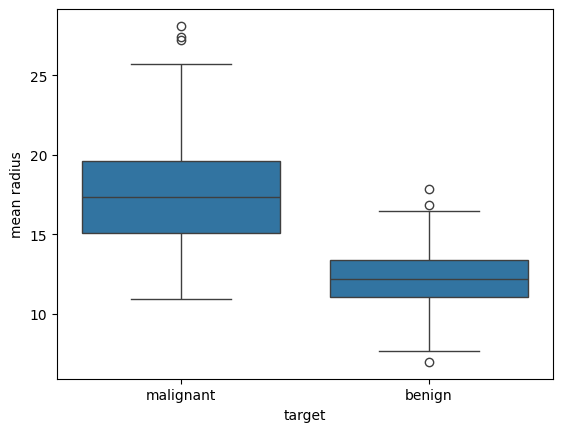

In [115]:
# Create a boxplot for mean radius by target type
ax = sns.boxplot( x=targetVector.map( targetNameMap ), y=featureMatrix['mean radius'])
plt.show()

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [116]:
# Split data into training and test sets

def getBalancedRandomState( n_iterations ):
  """ first find a random state that gives somewhat balanced test data """
  balances = []
  for rs in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split( featureMatrix, targetVector, random_state=rs )
    balance  = ( y_train.sum() / len( y_train )) - 0.5
    balances.append( abs( balance ))

  return int(pd.Series( balances ).sort_values().index[0])


random_state = getBalancedRandomState( n_iterations=10000 )

X_train, X_test, y_train, y_test = train_test_split( featureMatrix, targetVector, random_state=random_state )

print(f"{random_state=}")
print(f"\ntest  : {X_test.shape=}, {y_test.shape=}")
print(f"\ntrain : {X_train.shape=}, {y_train.shape=}")

y_train.value_counts()

random_state=9398

test  : X_test.shape=(143, 30), y_test.shape=(143,)

train : X_train.shape=(426, 30), y_train.shape=(426,)


,count
target,
1,245
0,181


In [117]:
# Build and train logistic regression model
lr = LogisticRegression( solver='liblinear' )
lr.fit( X_train, y_train )
lr

LogisticRegression(solver='liblinear')

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [118]:
# Evaluate the model
y_predict = lr.predict( X_test )

In [119]:
# Generate a confusion matrix
confusionMatrix = confusion_matrix( y_test, y_predict )
confusionMatrix

array([[ 27,   4],
       [  4, 108]])

In [120]:
# Generate a classification report
classificationReport = classification_report( y_test, y_predict )
print(classificationReport)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.96      0.96      0.96       112

    accuracy                           0.94       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.94      0.94      0.94       143



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [121]:
# Extract coefficients
coeffs = pd.Series( lr.coef_[0] , index=lr.feature_names_in_ )
coeffs.head()

,0
mean radius,1.850689
mean texture,0.100429
mean perimeter,0.115607
mean area,-0.011402
mean smoothness,-0.122978


In [122]:
# Normalize the coefficients by the standard deviation
coeffs_norm = coeffs / X_train.std()
coeffs_norm.head()

,0
mean radius,0.505875
mean texture,0.023583
mean perimeter,0.004590
mean area,-0.000031
mean smoothness,-8.676435


In [127]:
# Sort feature names and coefficients by absolute value of coefficients
coeffs_norm_abs = coeffs_norm.abs().sort_values( ascending=True )
coeffs_norm_abs.head()

,0
mean area,0.000031
worst area,0.000032
area error,0.002212
mean perimeter,0.004590
worst perimeter,0.005466


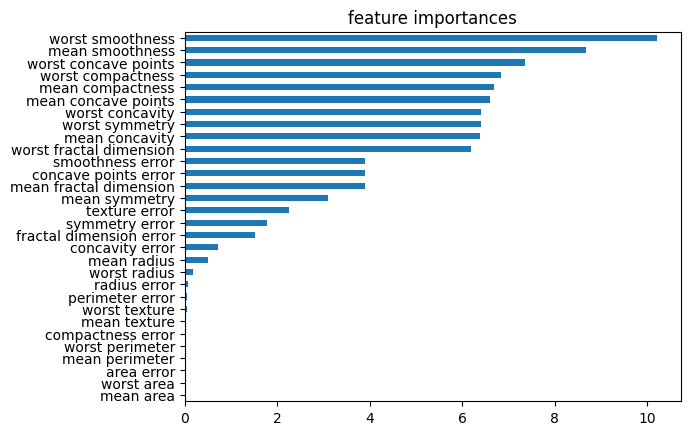


The most important feature appears to be 'worst smoothness'


In [128]:
# Visualize feature importances
ax = coeffs_norm_abs.plot(kind='barh', title='feature importances')
plt.show()

print(f"\nThe most important feature appears to be '{coeffs_norm_abs.index[-1]}'")